# <font color =blue> Examen Módulo 2 - Ecuaciones diferenciales.   </font>

Lea cuidadosamente las siguientes indicaciones antes de comenzar el examen:

- Para resolver el examen edite este mismo archivo y renómbrelo de la siguiente manera: *Examen1_ApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería Examen1_LopezMichel.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo.
- Recuerde que también se está evaluando su capacidad de interpretar los resultados. Escriba sus interpretaciones/conclusiones en celdas utilizando *Markdown*.
- No se resuelven dudas de ningún tipo por los profesores de la asignatura. Por favor, absténgase de preguntar.

<font color = blue> - El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera. <font>


In [1]:
%matplotlib inline 

import sympy as sym
import numpy as np
import matplotlib.pylab as plt

from sympy import init_printing; init_printing(use_latex='mathjax')
from IPython.display import display
from IPython.display import HTML
from scipy.integrate import odeint
from ipywidgets import *

sym.var('k t x a C1')

import seaborn as sns
sns.set()

T = sym.Function('T')

# <font color =blue>Primer punto.</font>

## Introducción al problema. 

### Ley de Newton del enfriamiento

La ley empírica de Newton, relativa al enfriamiento de un objeto, se expresa con la ecuación diferencial lineal de primer orden

$$\frac{dT}{dt} = k(T - Tm) $$

donde $k$ es una constante de proporcionalidad, $T(t)$ es la temperatura del objeto cuando $t > 0$
y $T_m$ es la temperatura ambiente; o sea, la temperatura del medio que rodea al objeto. 

Supondremos que $T_m$ es constante.

## <font color = red> Problema 1 <font>

### ¿Cuánto esperar para tomar el café?

Primero calentamos el agua a $80°C$. Posteriormente agregamos café al vaso con el agua caliente. Después realizamos la medición de la temperatura ambiente, la cual fue de $24°C$. Realiza las siguientes actividades:

1. (20 puntos) Simula el sistema en un tiempo de $0$ a $120$ unidades de tiempo  con una constante de proporcionalidad $k=-0.0565$,  
2. (15 puntos) 
    - (10 puntos) Grafique la solución.
    - (5 puntos) Supoga que cada unidad de tiempo corresponde a un minuto. ¿En que tiempo aproximadamente la temperatura es menor a $30°C$?
3. (15 puntos)
    - (10 puntos) ¿Qué interpretación puedes decir para valores de $k >0$?
    - (5  puntos) Busca una constante de proporcionalidad $k$ en un rango ( de $-0.2$ a $0.2$ con incremento de 0.01), para la cual el cafe tiene una temperatura menor de $30°C$ en un tiempo a 20 minutos.

In [68]:
#Resultado: Punto 1
tiempo=np.linspace(0,120,121)
k1=-.0565
Tm=24.0
T0=80.0

sistema1= lambda T,t: k1*(T-Tm)
sol1=odeint(sistema1,T0,tiempo).T

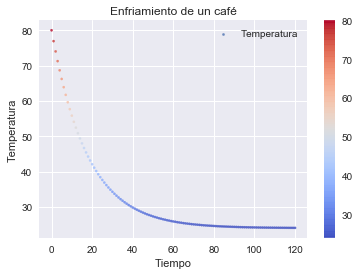

In [69]:
#Resultado: Punto 2
plt.figure()
plt.scatter(tiempo,sol1,label='Temperatura',c=sol1,cmap='coolwarm',s=5,alpha=.8)
plt.xlabel('Tiempo')
plt.ylabel('Temperatura')
plt.colorbar()
plt.title('Enfriamiento de un café')
plt.legend();

In [70]:
print("El café tendrá una temperatura menor a 30 a partir del minuto: ",tiempo[sol1[0]<30][0])

El café tendrá una temperatura menor a 30 a partir del minuto:  40.0


In [97]:
#Resultado: Punto 3
Temperatura=sym.dsolve(T(t).diff(t)-k*(T(t)-24)).rhs
Temperatura=Temperatura.subs(C1,sym.solve(Temperatura.subs(t,0)-80,C1)[0])
Temperatura

    k⋅t     
56⋅ℯ    + 24

#### Interpretación
Podemos notar que la función que cumple con la ecuación diferencial es de forma exponencial esto nos dice que:
* Si la K es negativa tnemos que la temperatura decae hasta llegar al valor de la temperatura ambiente, y esta solución nos da sentido físico, pero...
* Si la K es positiva en vez de tener un decaimiento tendremos que la temperatura subirá de manera exponencial hasta el infinito, lo que no nos da ningún significado físico

In [62]:
k2=np.arange(-.2,.2,.01)

array([-2.00000000e-01, -1.90000000e-01, -1.80000000e-01, -1.70000000e-01,
       -1.60000000e-01, -1.50000000e-01, -1.40000000e-01, -1.30000000e-01,
       -1.20000000e-01, -1.10000000e-01, -1.00000000e-01, -9.00000000e-02,
       -8.00000000e-02, -7.00000000e-02, -6.00000000e-02, -5.00000000e-02,
       -4.00000000e-02, -3.00000000e-02, -2.00000000e-02, -1.00000000e-02,
        1.66533454e-16,  1.00000000e-02,  2.00000000e-02,  3.00000000e-02,
        4.00000000e-02,  5.00000000e-02,  6.00000000e-02,  7.00000000e-02,
        8.00000000e-02,  9.00000000e-02,  1.00000000e-01,  1.10000000e-01,
        1.20000000e-01,  1.30000000e-01,  1.40000000e-01,  1.50000000e-01,
        1.60000000e-01,  1.70000000e-01,  1.80000000e-01,  1.90000000e-01])

#### K's posibles
Todas las k posibles que cumplan con la condición de que se encuentren de -.2 a .2 con intervalo de .1 y den una temperatura menor a 30 a los 20 minutos se presentan a continuación

In [108]:
k3=np.array(list(filter(lambda k:56*sym.exp(k*20)+24<30,k2)))
k3

array([-0.2 , -0.19, -0.18, -0.17, -0.16, -0.15, -0.14, -0.13, -0.12])

# <font color =blue>Segundo punto.</font>

## Introducción al problema. 

### Caída libre

En la caída libre ideal, se desprecia la resistencia aerodinámica que presenta el aire al movimiento del cuerpo, analizando lo que pasaría en el vacío. En esas condiciones, la aceleración que adquiriría el cuerpo sería debida exclusivamente a la gravedad, siendo independiente de su masa.

$$
\begin{eqnarray}
\frac{ds}{dt} &=& v \\
\frac{dv}{dt} &=& -g
\end{eqnarray}
$$

O visto el sistema en forma canónica

$$
\begin{eqnarray}
\dot{x}_1 &=& x_2 \\
\dot{x}_2 &=& -g
\end{eqnarray}
$$


## <font color = red> Problema 2 <font>

### Deja caer una pelota

Desde un edificio de altura de $314$ metros se deja caer una pelota, que tarda 8 segundos en llegar al piso. ¿con que velocidad impacta la pelota contra el piso?


1. (20 puntos) Simula el sistema en un tiempo de $0$ a $8$ unidades de tiempo  con una constante de gravedad $g=-9.8$,  
2. (15 puntos) 
    - (10 puntos) Grafique la solución.
    - (5 puntos) Supoga que cada unidad de tiempo corresponde a un segundo. ¿En que tiempo aproximadamente la pelota esta a la mitad del edificio?
3. (15 puntos)
    - (10 puntos) ¿Qué interpretación puedes decir para una posicion inicial de $314 m$ y una velocidad de $30 m/s$ ?
    - (5  puntos) ¿Que altura aproximadamente tendra en $10s$ para el incisio anterior?





In [167]:
altura=314 #metros
g=9.8 

tiempo2=np.arange(0,8.1,.1)
sistema2= lambda var,t:[var[1],-g]
sol2=odeint(sistema2,[altura,0],tiempo2).T

#### Gráficas de la solución

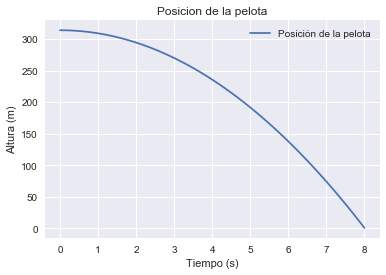

In [137]:
plt.figure()
plt.plot(tiempo2,sol2[0],label='Posición de la pelota')
plt.legend()
plt.xlabel('Tiempo (s)')
plt.ylabel('Altura (m)');
plt.title('Posicion de la pelota');

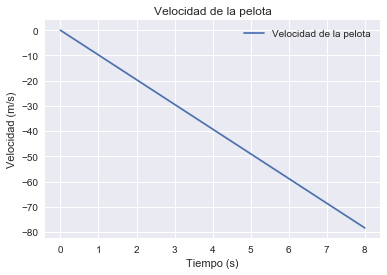

In [138]:
plt.figure()
plt.plot(tiempo2,sol2[1],label='Velocidad de la pelota')
plt.legend()
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad (m/s)');
plt.title('Velocidad de la pelota');

#### En que tiempo estará a la mitad del edificio?

In [141]:
print('La pelota estara a la mitad del edificion a los ',tiempo2[sol2[0]<(314/2)][0],'segundos')

La pelota estara a la mitad del edificion a los  5.7 segundos


#### ¿Qué interpretación puedes decir para una posicion inicial de $314 m$ y una velocidad de $30 m/s$ ?

Como la velocidad es positiva quiere decir que el movimiento en la posición inicial es hacia arriba, esto significa que la pelota fue lanzada hacia arriba y lo que ocurrirá es que subirá hasta un máximo y luego empezará su descenso

In [158]:
tiempo2b=np.arange(0,10.1,.1)
sol2b=odeint(sistema2,[314,30],tiempo2b).T

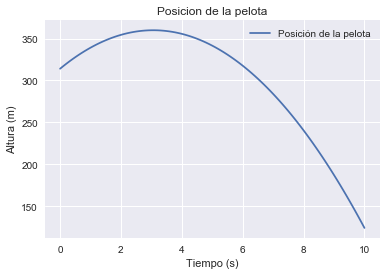

In [159]:
plt.figure()
plt.plot(tiempo2b,sol2b[0],label='Posición de la pelota')
plt.legend()
plt.xlabel('Tiempo (s)')
plt.ylabel('Altura (m)');
plt.title('Posicion de la pelota');

#### ¿Que altura aproximadamente tendra en $10s$ para el incisio anterior?

In [165]:
print("La posición a los 10s será de : ",sol2b[0][-1],'metros')

La posición a los 10s será de :  123.99999999854111 metros


# <font color =blue>Tercer punto.</font>

## Introducción al problema. 

## Drenado de un tanque (Ley de Torricelli)

En hidrodinámica, la ley de Torricelli establece que la velocidad
$v$ de flujo de salida de agua a través de un orificio plano ubicado en la parte inferior
de un tanque lleno hasta una altura $h$ será igual a la velocidad que un cuerpo (en este caso
una gota de agua) adquiriría en caída libre desde una altura $h$; es decir, $v = \sqrt{2gh}$, donde $g$ es la aceleración debida a la gravedad.


Suponga que un tanque lleno de agua puede drenar mediante un orificio bajo la influencia de la gravedad. Deseamos encontrar la altura $h$ del agua restante en el tanque en el tiempo $t$.

Si el área del orificio es $A_h$ (en $m^2$) y la velocidad del agua que sale del tanque es $v = \sqrt{2gh}$ (en m/s), entonces el volumen del agua que abandona el tanque por segundo es $A_h \sqrt{2gh}$ (en $m^3$/s). De este modo, si $V(t)$ indica el volumen del agua que hay en el tanque en el tiempo $t$, la ecuación diferencial deseada para la altura del agua en el tiempo t:

$$\frac{dh}{dt} = - \frac{A_h}{A_w} \sqrt{2gh} $$


Donde $A_w$ (en $m^2$) representa el área constante de la superficie superior del agua.

Observe que aquí ignoramos la posibilidad de fricción en el orificio, la cual puede ocasionar una reducción en la velocidad del flujo en
dicho lugar



## <font color = red> Problema 3 <font>

### Drenado de un tanque 

Concidere un cilindro circular con un área constante de $A_w = 5 m^2$, en la parte inferior contiene un orificio de área $A_h = 1 m^2$ el cual podemos estar regulando la salida del liquido. En el interior del tanque se encuentra un liquido el cual tiene una altura inicial en el tiempo $0$ de $h(0)= 10 m$. Realiza las siguientes actividades:

1. (20 puntos) Simula el sistema en un tiempo de $0$ a $6.5$ unidades de tiempo,  
2. (15 puntos) 
    - (10 puntos) Grafique la solución.
    - (5 puntos) Supoga que cada unidad de tiempo corresponde a un minuto. ¿En que tiempo aproximadamente la altura del liquido alcanza una altura de $h=2 m$?
3. (15 puntos)
    - (10 puntos) ¿Qué interpretación puedes decir si el signo de la ecuación fuera positivo?
    - (5  puntos)  ¿Si el área del orificio $A_h$ es menor a $1 m^2$ que implicaria? Realiza una simulacion y grafica la solución para un orificio de $A_h = .5 m$ 

In [185]:
Aw=5.0 #metros cuadrados
Ah=1.0 #metros cuadrados
h0=10.0 #metros

tiempo3=np.arange(0,6.6,.1)
sistema3=lambda h,t: -(Ah/Aw)*(np.abs(2*g*h))**(1/2)

sol3=odeint(sistema3,h0,tiempo3).T

**Se hizo una pequeña correción en la fórmula ya que al parecer el método de odeint generaba algún número negativo dentro de la raiz, por lo cual puse un valor absoluto para que corriera bien**

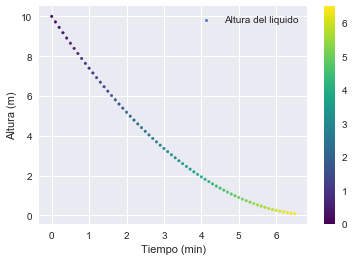

In [199]:
plt.figure()
plt.scatter(tiempo3,sol3[0],label='Altura del liquido',s=7,c=tiempo3,cmap='viridis')
plt.legend()
plt.colorbar()
plt.xlabel('Tiempo (min)')
plt.ylabel('Altura (m)');

#### Supoga que cada unidad de tiempo corresponde a un minuto. ¿En que tiempo aproximadamente la altura del liquido alcanza una altura de $h=2 m$?

In [196]:
print('El liquido alcanzara una alutra de 2m en aproximadamente: ',tiempo3[sol3[0]<2][0],' minutos')

El liquido alcanzara una alutra de 2m en:  4.0  minutos


#### ¿Qué interpretación puedes decir si el signo de la ecuación fuera positivo?

Significaría que en vez de que el agua se esté drenando y esté bajando su altura en realidad el líquido se está metiendo por el orificio cómo si la gravedad lo empujara hacia dentro del tanque en este caso o si se aplicara una fuerza o una bomba hidráulica tal que imite a la fuerza de gravedad pero en sentido opuesto

In [202]:
sistema3b=lambda h,t: (Ah/Aw)*(np.abs(2*g*h))**(1/2)
sol3b=odeint(sistema3b,h0,tiempo3).T

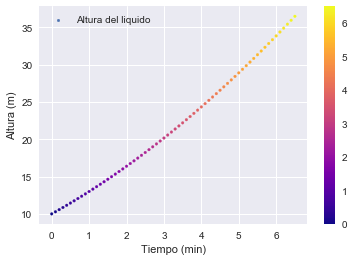

In [203]:
plt.figure()
plt.scatter(tiempo3,sol3b[0],label='Altura del liquido',s=7,c=tiempo3,cmap='plasma')
plt.legend()
plt.colorbar()
plt.xlabel('Tiempo (min)')
plt.ylabel('Altura (m)');

#### ¿Si el área del orificio $A_h$ es menor a $1 m^2$ que implicaria? Realiza una simulacion y grafica la solución para un orificio de $A_h = .5 m$ 

Si $A_h$ es menor implica que el volumen que sale del tanque por unidad de tiempo es menor, esto implica que el nivel del agua baje mas lento ya que no hay tanto espacio para que pase el agua

In [213]:
Ahc=.5
sistema3c=lambda h,t: -(Ahc/Aw)*(np.abs(2*g*h))**(1/2)
sol3c=odeint(sistema3c,h0,tiempo3).T

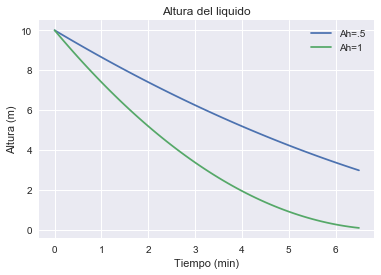

In [216]:
plt.figure()
plt.plot(tiempo3,sol3c[0],label='Ah=.5')
plt.plot(tiempo3,sol3[0],label='Ah=1')
plt.legend()
plt.title('Altura del liquido')
plt.xlabel('Tiempo (min)')
plt.ylabel('Altura (m)');

# <font color =blue>Cuarto punto.</font>

Consideramos un modelo simple de la dinámica del amor/odio en una pareja, propuesto por Strogatz en 1988.

- Strogatz, S.H. (1988) *Love affairs and differential equations*, Math. Magazine 61, 35.

### Las cosas del amor.

Romeo está enamorado de Julieta, pero en este caso, Julieta tiene sentimientos volubles. Mientras Romeo más la ama, ella quiere huir de él. Pero cuando Romeo no muestra atención, Julieta lo empieza a ver muy atractivo.

Del otro lado, Romeo tiene sentimientos imitativos. Esto quiere decir que se pone cariñoso cuando ella lo ama y se vuelve frío cuando ella lo odia.

Sean:

- $x_1(t)$ : amor/odio de Romeo hacia Julieta en el tiempo  $t$ .
- $x_2(t)$ : amor/odio de Julieta hacia Romeo en el tiempo  $t$ .

Consideraremos que un valor positivo de  $x_1$  o  $x_2$  corresponde a amor, y que un valor negativo corresponde a odio.

## <font color = red> Problema 4 <font>
    
Un modelo del romance anteriormente descrito es
$$ \frac{dx_1}{dt}=ax_2,$$
$$ \frac{dx_2}{dt}=−bx_1$$
 
con  $a$  y  $b$  constantes positivas. Definimos  $x=[x_1,x_2]^T$.

1. (20 puntos) Simular este sistema eligiendo los parámetros  $a=b=1$  y condiciones iniciales  $x(0)=[x_1(0),x_2(0)]^T=[5,5]^T$, usando un vector de tiempo de $0$ a $50$ (unidades de tiempo).
2. (15 puntos)
    - (10 puntos) Graficar las soluciones en el tiempo, es decir,  $x_1$  vs. $t$  y  $x_2$ vs  $t$.  
    - (5 puntos) ¿Qué forma tienen dichas soluciones? ¿Qué se puede decir del amor/odio de Romeo hacia Julieta? ¿Qué se puede decir del amor/odio de Julieta hacia Romeo?
3. (15 puntos)
    - (10 puntos) Graficar el retrato de fase, es decir,  $x_2$  vs  $x_1$.
    - (5 puntos) ¿Cómo es el amor de Romeo y Julieta? ¿Considera usted sano este tipo de amor?

In [217]:
tiempo4=np.arange(0,50.1,.1)
a,b=1,1
x0=[5,5]

sistema4=lambda var,t:[a*var[1],-b*var[0]]

sol4=odeint(sistema4,x0,tiempo4).T

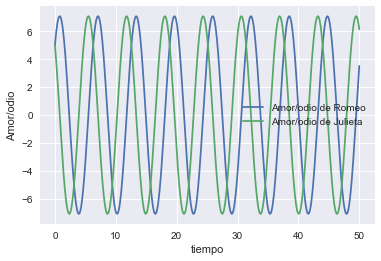

In [219]:
plt.figure()
plt.plot(tiempo4,sol4[0],label='Amor/odio de Romeo')
plt.plot(tiempo4,sol4[1],label='Amor/odio de Julieta')
plt.legend()
plt.xlabel('tiempo')
plt.ylabel('Amor/odio');

#### ¿Qué forma tienen dichas soluciones? ¿Qué se puede decir del amor/odio de Romeo hacia Julieta? ¿Qué se puede decir del amor/odio de Julieta hacia Romeo?

Tienen forma de senos o cosenos, funciones periódicas, esto nos dice que el amor/ odio de romeio a julieta y de julieta a romeo siempre van a estar oscilando

#### Retrato de Fase

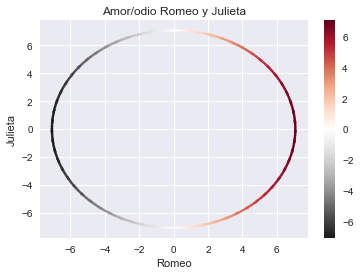

In [227]:
plt.figure()
plt.scatter(sol4[0],sol4[1],label='Amor/odio de Julieta',c=sol4[0],cmap='RdGy_r',s=5)
plt.title('Amor/odio Romeo y Julieta')
plt.colorbar()
plt.xlabel('Romeo')
plt.ylabel('Julieta');

#### ¿Cómo es el amor de Romeo y Julieta? ¿Considera usted sano este tipo de amor?

Es cíclico y muy dependendiente del otro, yo consideraría que su amor es muy tóxico y que deberían de acudir a terapia de pareja con un psicólogo

# <font color =blue>Quinto punto.</font>

## <font color = red> Problema 5 <font>
    
En este punto consideraremos a Romeo y a Julieta como dos amantes cautelosos idénticos.

Entonces, un modelo que describe este romance es

$$\frac{dx_1}{dt} = -ax_1 + bx_2$$
$$\frac{dx_2}{dt} = bx_1 -ax_2$$
 
con  $a$  y  $b$  constantes positivas. Definimos  $x=[x_1,x_2]^T$.

Simular este sistema y obtener gráficas de  $x_1$  vs.  $t$ ,  $x_2$  vs.  $t$ y  $x_2$  vs.  $x_1$  en cada uno de los siguientes casos. Además, concluya acerca de cómo es el amor entre Romeo y Julieta cuando  $t \rightarrow \infty$.


1. (25 puntos) Para  $a=2$  y  $b=1$.

    - $x(0)=[x_1(0),x_2(0)]^T =[2,1]^T$.
    - $x(0)=[x_1(0),x_2(0)]^T =[−2,1]^T$.
    - $x(0)=[x_1(0),x_2(0)]^T =[−2,−1]^T$.
    - $x(0)=[x_1(0),x_2(0)]^T =[2,−1]^T$.
2. (25 puntos) Para  $a=1$  y  $b=2$.
    - $x(0)=[x_1(0),x_2(0)]T=[2,1]^T$.
    - $x(0)=[x_1(0),x_2(0)]T=[−2,1]^T$.
    - $x(0)=[x_1(0),x_2(0)]T=[−2,−1]^T$.
    - $x(0)=[x_1(0),x_2(0)]T=[2,−1]^T$.

In [266]:
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

In [229]:
x0_a=[[2,1],[-2,1],[-2,-1],[2,-1]]
sistema5=lambda var,t,a,b:[-a*var[0]+b*var[1],b*var[0]-a*var[1]]

#### Para $a=2$ y $b=1$

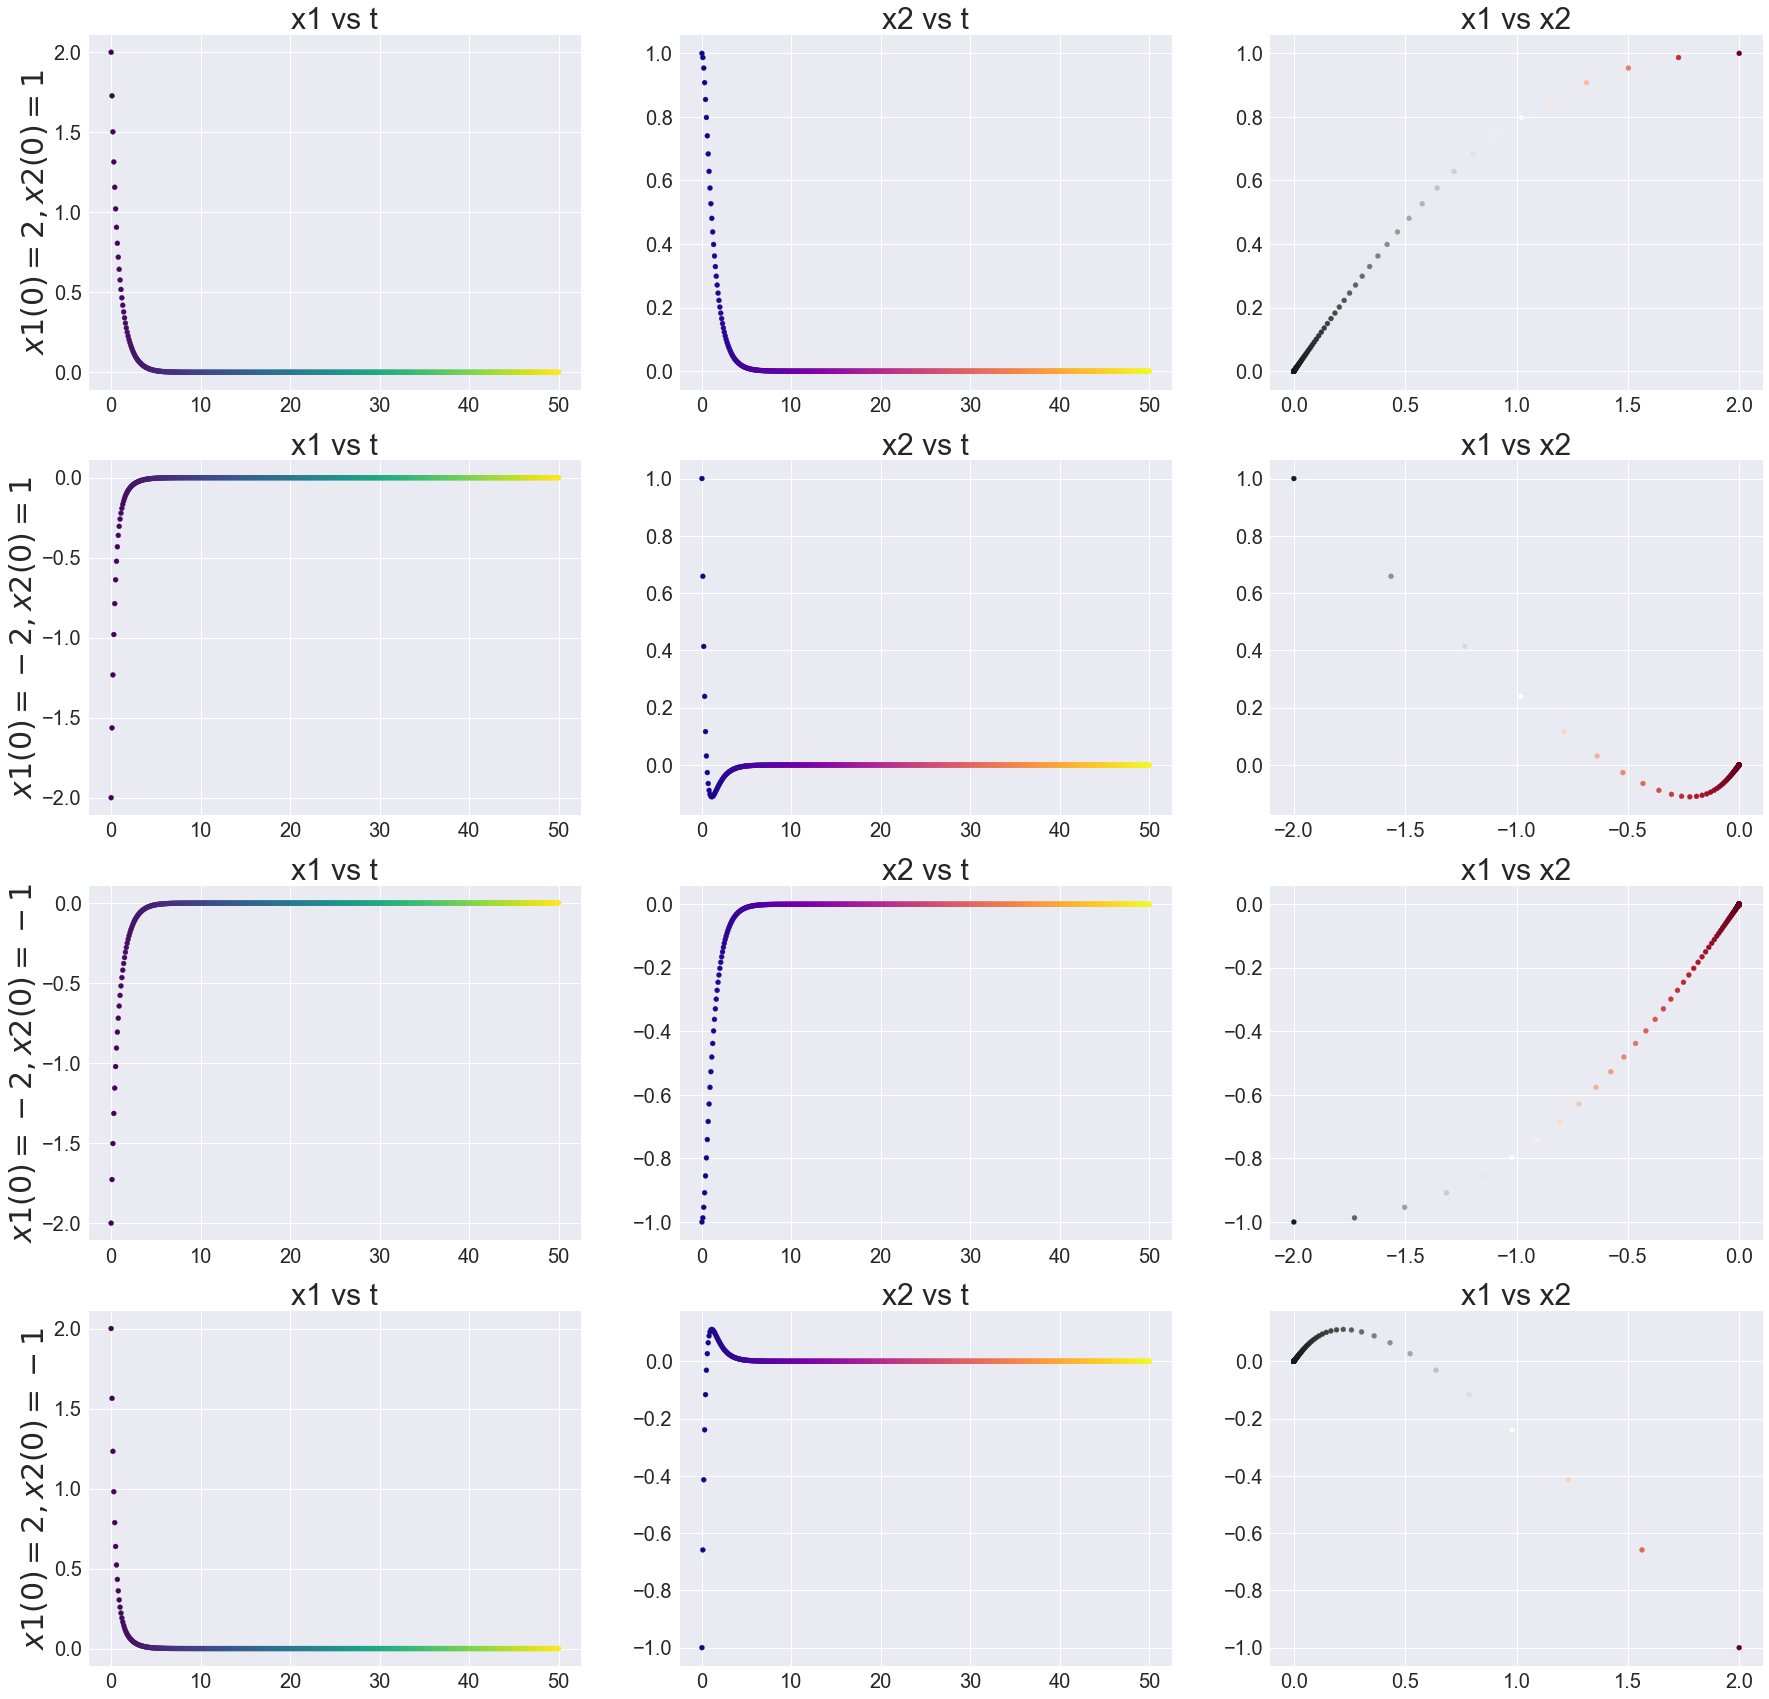

In [278]:
fig, axs = plt.subplots(4, 3,figsize=(30,30))
for i in range(4):
    sol5a=odeint(sistema5,x0_a[i],tiempo4,args=(2,1)).T
    axs[i,0].scatter(tiempo4,sol5a[0],c=tiempo4,cmap='viridis',s=25)
    axs[i,0].set_ylabel('$x1(0)={},  x2(0)={}$'.format(x0_a[i][0],x0_a[i][1]),fontsize=30)
    axs[i,0].set_title('x1 vs t',fontsize=30)
    axs[i,1].scatter(tiempo4,sol5a[1],c=tiempo4,cmap='plasma',s=25)
    axs[i,1].set_title('x2 vs t',fontsize=30)
    axs[i,2].scatter(sol5a[0],sol5a[1],c=sol5a[0],cmap='RdGy_r',s=25)
    axs[i,2].set_title('x1 vs x2',fontsize=30)

#### Para $a=1$ y $b=2$

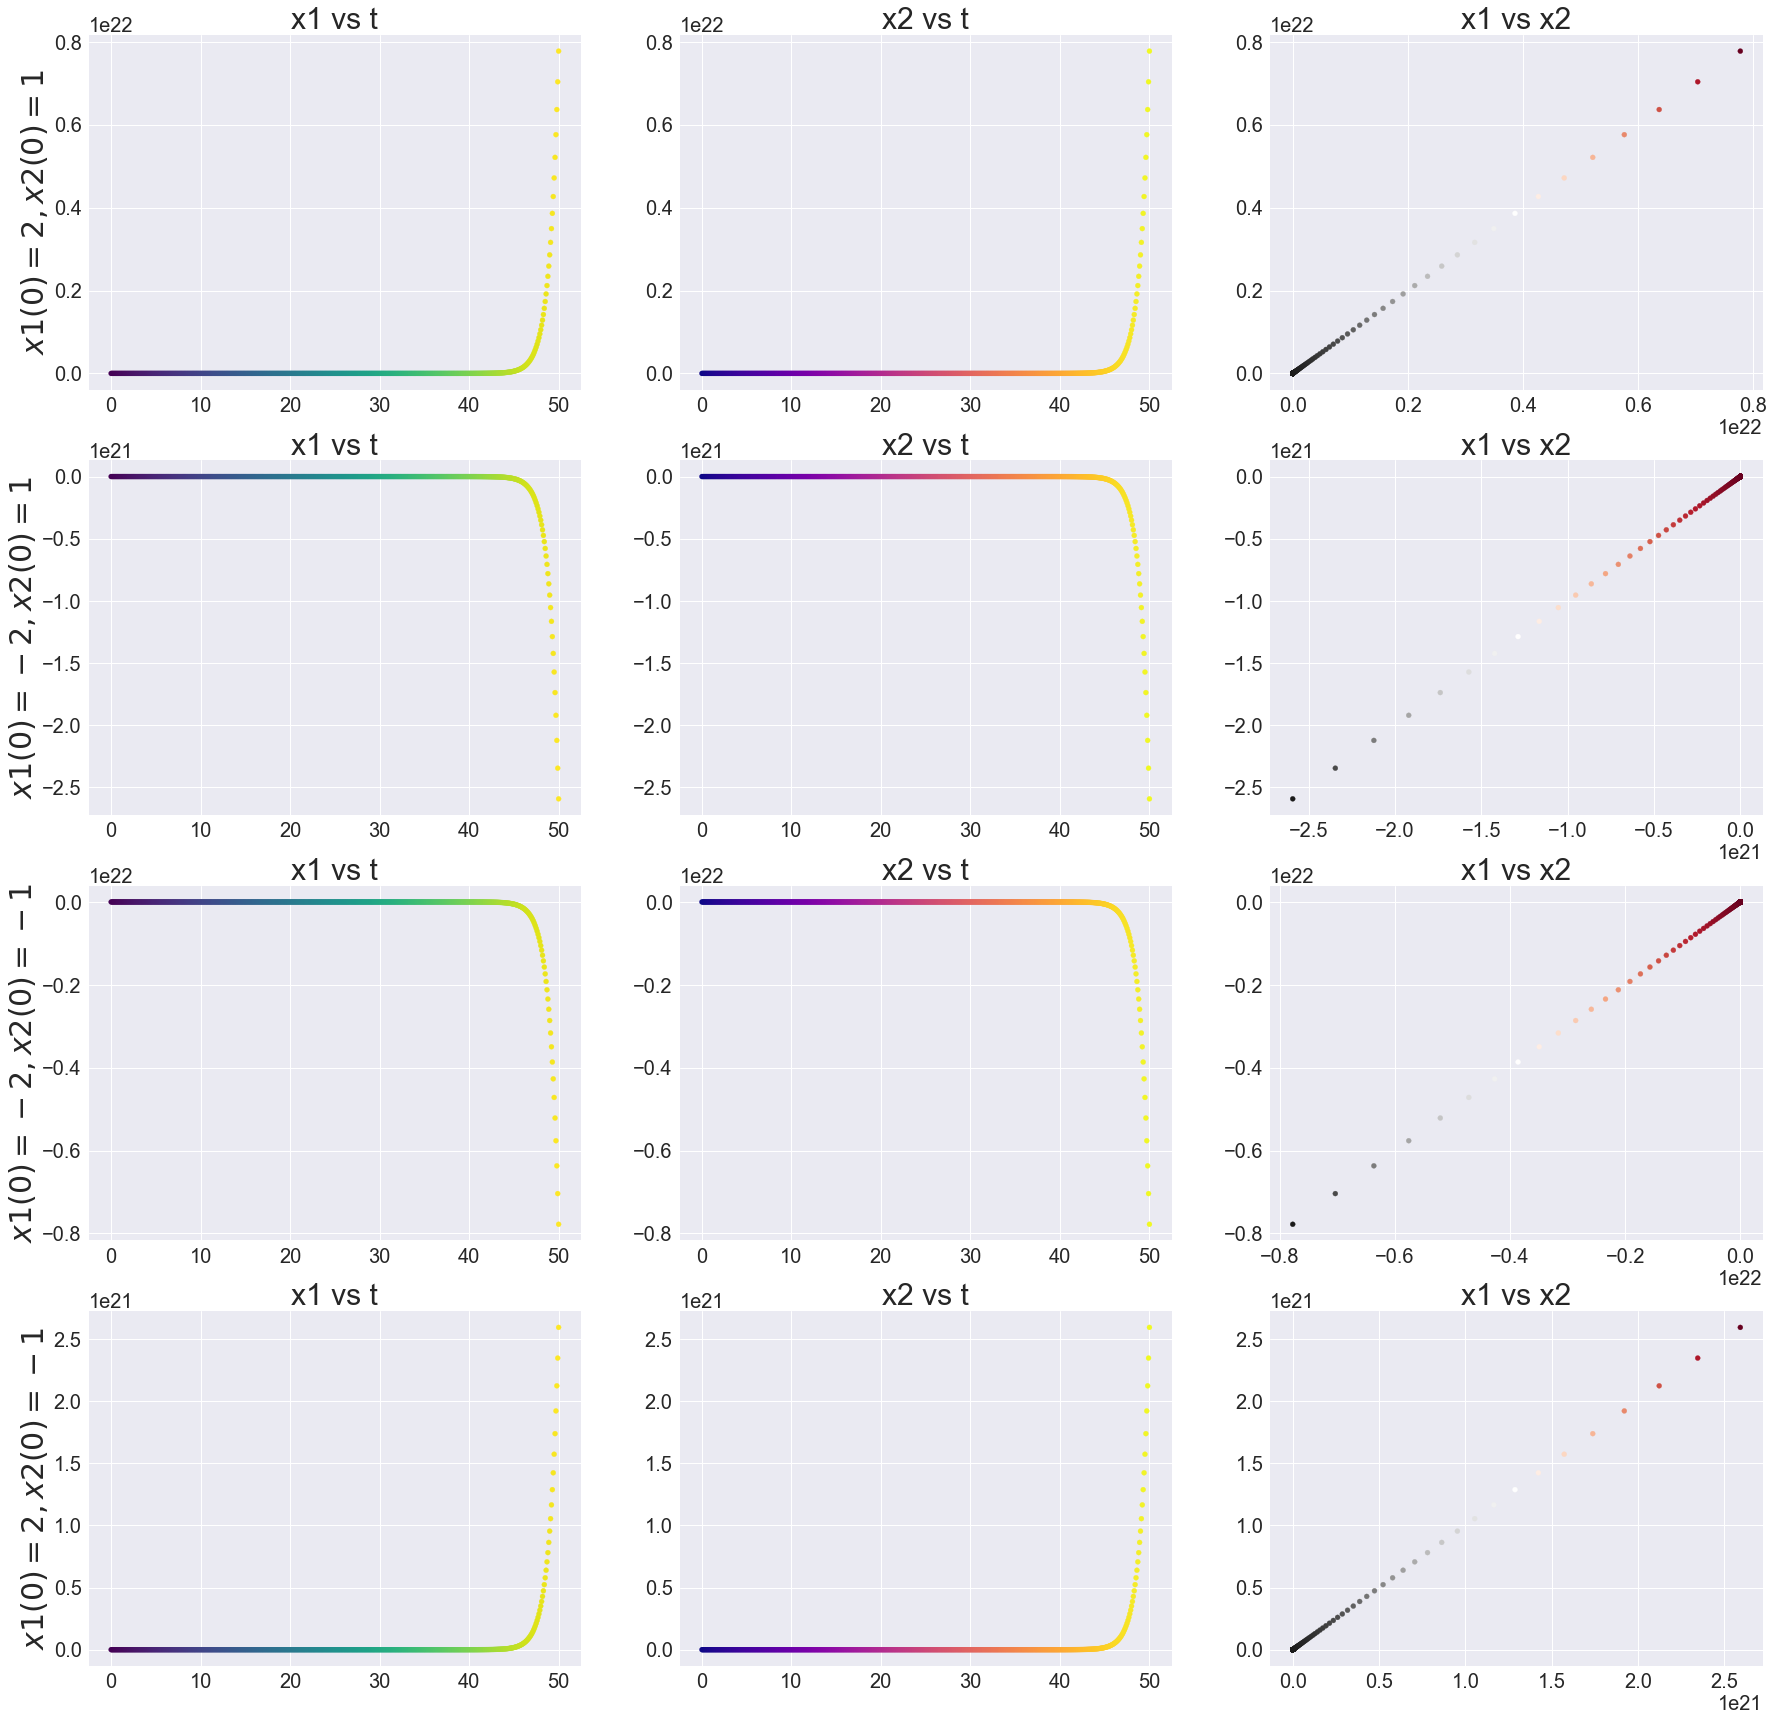

In [277]:
fig, axs = plt.subplots(4, 3,figsize=(30,30))
for i in range(4):
    sol5a=odeint(sistema5,x0_a[i],tiempo4,args=(1,2)).T
    axs[i,0].scatter(tiempo4,sol5a[0],c=tiempo4,cmap='viridis',s=25)
    axs[i,0].set_ylabel('$x1(0)={},  x2(0)={}$'.format(x0_a[i][0],x0_a[i][1]),fontsize=30)
    axs[i,0].set_title('x1 vs t',fontsize=30)
    axs[i,1].scatter(tiempo4,sol5a[1],c=tiempo4,cmap='plasma',s=25)
    axs[i,1].set_title('x2 vs t',fontsize=30)
    axs[i,2].scatter(sol5a[0],sol5a[1],c=sol5a[0],cmap='RdGy_r',s=25)
    axs[i,2].set_title('x1 vs x2',fontsize=30)